In [ ]:
! pip install geopandas

In [ ]:
! pip install contextily

In [ ]:
#import necessary packages
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to graph with geopandas, you also need to install descartes
import geopandas as gpd
from geopandas import GeoDataFrame
import descartes
from shapely.geometry import Point, Polygon
from functools import partial
import pyproj
from pyproj import Transformer
from pyproj import CRS
from shapely.ops import transform
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
#to make nice looking legends
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import contextily as ctx 
import os 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA 606 Capstone Project/Datasets and Information/CSVs/ML_dataset.csv')

In [ ]:
df.shape

(3630440, 41)

In [ ]:
df.head()

,Unnamed: 0,zip,period_begin,property_type,median_sale_price,median_list_price,homes_sold,new_listings,median_dom,sold_above_list,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,ChildPoverty,Professional,Service,Office,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,avg_nearby_groche_counts,num_food_deserts,desert
0,0,6409,12/1/2015,All Residential,196000.0,284500.0,1,1.0,420.0,0.0,Middlesex,6634,3244,3390,2.3,95.0,2.5,0.0,0.2,0.0,5280,5.2,51.6,12.2,20.3,80.3,4.0,5.3,0.0,1.9,8.4,28.8,3267,72.8,8.0,19.3,0.0,4.8,3.0,0,Well Fed
1,1,6409,11/1/2019,Single Family Residential,155000.0,187200.0,4,2.0,98.0,0.0,Middlesex,6634,3244,3390,2.3,95.0,2.5,0.0,0.2,0.0,5280,5.2,51.6,12.2,20.3,80.3,4.0,5.3,0.0,1.9,8.4,28.8,3267,72.8,8.0,19.3,0.0,4.8,3.0,0,Well Fed
2,2,6409,9/1/2019,Single Family Residential,309000.0,322900.0,5,3.0,113.0,0.0,Middlesex,6634,3244,3390,2.3,95.0,2.5,0.0,0.2,0.0,5280,5.2,51.6,12.2,20.3,80.3,4.0,5.3,0.0,1.9,8.4,28.8,3267,72.8,8.0,19.3,0.0,4.8,3.0,0,Well Fed
3,3,6409,12/1/2018,Single Family Residential,325000.0,408000.0,3,1.0,82.0,0.0,Middlesex,6634,3244,3390,2.3,95.0,2.5,0.0,0.2,0.0,5280,5.2,51.6,12.2,20.3,80.3,4.0,5.3,0.0,1.9,8.4,28.8,3267,72.8,8.0,19.3,0.0,4.8,3.0,0,Well Fed
4,4,6409,11/1/2021,All Residential,357500.0,329000.0,6,1.0,69.0,0.5,Middlesex,6634,3244,3390,2.3,95.0,2.5,0.0,0.2,0.0,5280,5.2,51.6,12.2,20.3,80.3,4.0,5.3,0.0,1.9,8.4,28.8,3267,72.8,8.0,19.3,0.0,4.8,3.0,0,Well Fed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630440 entries, 0 to 3630439
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   zip                       int64  
 2   period_begin              object 
 3   property_type             object 
 4   median_sale_price         float64
 5   median_list_price         float64
 6   homes_sold                int64  
 7   new_listings              float64
 8   median_dom                float64
 9   sold_above_list           float64
 10  County                    object 
 11  TotalPop                  int64  
 12  Men                       int64  
 13  Women                     int64  
 14  Hispanic                  float64
 15  White                     float64
 16  Black                     float64
 17  Native                    float64
 18  Asian                     float64
 19  Pacific                   float64
 20  Citizen                 

In [ ]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,Unnamed: 0,zip,median_sale_price,median_list_price,homes_sold,new_listings,median_dom,sold_above_list,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,ChildPoverty,Professional,Service,Office,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,avg_nearby_groche_counts,num_food_deserts
count,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06
mean,1.816378e+06,4.188272e+04,2.751597e+05,3.216689e+05,6.837834e+01,7.990058e+01,4.877209e+01,2.487797e-01,4.792336e+03,2.347479e+03,2.444857e+03,1.371077e+01,5.951808e+01,1.727654e+01,6.374953e-01,6.197179e+00,7.209793e-02,3.281452e+03,1.723483e+01,4.328277e+01,1.666986e+01,2.362184e+01,7.468096e+01,9.659042e+00,6.053723e+00,2.315432e+00,1.857783e+00,5.431916e+00,2.854748e+01,2.387203e+03,7.913074e+01,1.540470e+01,5.322610e+00,1.437661e-01,7.684810e+00,5.811035e+00,4.560374e-01
std,1.048184e+06,2.596114e+04,1.835929e+05,5.539333e+06,7.915102e+01,9.194875e+01,4.927700e+01,1.945761e-01,2.221778e+03,1.094233e+03,1.162522e+03,1.670910e+01,2.770462e+01,2.380950e+01,3.292872e+00,7.471049e+00,4.011492e-01,1.490531e+03,1.883119e+01,1.661006e+01,7.858289e+00,6.038255e+00,1.139969e+01,5.304085e+00,8.029057e+00,4.326805e+00,2.172338e+00,3.726385e+00,6.049108e+00,1.150680e+03,7.614308e+00,7.485458e+00,2.852968e+00,3.814474e-01,5.232491e+00,1.399451e+01,4.980636e-01
min,0.000000e+00,6.001000e+03,2.880000e+02,6.750000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.660000e+02,2.140000e+02,1.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.480000e+02,0.000000e+00,5.000000e-01,0.000000e+00,4.600000e+00,1.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.300000e+00,4.000000e+01,2.670000e+01,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.115505e+05,2.122200e+04,1.580000e+05,1.652000e+05,1.000000e+01,1.100000e+01,2.500000e+01,1.232877e-01,3.284000e+03,1.587000e+03,1.671000e+03,3.200000e+00,3.950000e+01,2.500000e+00,0.000000e+00,1.200000e+00,0.000000e+00,2.257000e+03,3.000000e+00,3.110000e+01,1.100000e+01,1.960000e+01,7.010000e+01,6.000000e+00,1.000000e+00,3.000000e-01,5.000000e-01,2.700000e+00,2.400000e+01,1.579000e+03,7.450000e+01,1.000000e+01,3.300000e+00,0.000000e+00,4.100000e+00,0.000000e+00,0.000000e+00
50%,1.814600e+06,3.011500e+04,2.350000e+05,2.450000e+05,3.700000e+01,4.300000e+01,3.900000e+01,2.167832e-01,4.481000e+03,2.172000e+03,2.274000e+03,7.200000e+00,6.630000e+01,7.400000e+00,0.000000e+00,3.500000e+00,0.000000e+00,3.062000e+03,9.800000e+00,4.260000e+01,1.550000e+01,2.350000e+01,7.760000e+01,8.700000e+00,3.000000e+00,1.100000e+00,1.200000e+00,4.800000e+00,2.810000e+01,2.214000e+03,8.020000e+01,1.420000e+01,5.000000e+00,0.000000e+00,6.300000e+00,1.000000e+00,0.000000e+00
75%,2.725516e+06,5.541800e+04,3.450000e+05,3.599000e+05,1.020000e+02,1.200000e+02,5.800000e+01,3.333333e-01,5.900000e+03,2.901000e+03,3.014000e+03,1.700000e+01,8.290000e+01,2.050000e+01,5.000000e-01,8.400000e+00,0.000000e+00,4.034000e+03,2.610000e+01,5.530000e+01,2.110000e+01,2.760000e+01,8.230000e+01,1.220000e+01,7.700000e+00,2.500000e+00,2.500000e+00,7.300000e+00,3.250000e+01,3.006000e+03,8.460000e+01,1.960000e+01,6.900000e+00,0.000000e+00,9.700000e+00,5.000000e+00,1.000000e+00
max,3.630439e+06,8.573900e+04,9.500000e+06,1.000000e+09,7.060000e+02,7.300000e+02,3.097000e+03,1.000000e+00,2.342600e+04,1.235300e+04,1.107300e+04,9.570000e+01,9.980000e+01,1.000000e+02,8.560000e+01,6.170000e+01,1.29

In [ ]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Unnamed: 0,zip,median_sale_price,median_list_price,homes_sold,new_listings,median_dom,sold_above_list,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,ChildPoverty,Professional,Service,Office,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,avg_nearby_groche_counts,num_food_deserts
count,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06,3.523459e+06
mean,1.816378e+06,4.188272e+04,2.751597e+05,3.216689e+05,6.837834e+01,7.990058e+01,4.877209e+01,2.487797e-01,4.792336e+03,2.347479e+03,2.444857e+03,1.371077e+01,5.951808e+01,1.727654e+01,6.374953e-01,6.197179e+00,7.209793e-02,3.281452e+03,1.723483e+01,4.328277e+01,1.666986e+01,2.362184e+01,7.468096e+01,9.659042e+00,6.053723e+00,2.315432e+00,1.857783e+00,5.431916e+00,2.854748e+01,2.387203e+03,7.913074e+01,1.540470e+01,5.322610e+00,1.437661e-01,7.684810e+00,5.811035e+00,4.560374e-01
std,1.048184e+06,2.596114e+04,1.835929e+05,5.539333e+06,7.915102e+01,9.194875e+01,4.927700e+01,1.945761e-01,2.221778e+03,1.094233e+03,1.162522e+03,1.670910e+01,2.770462e+01,2.380950e+01,3.292872e+00,7.471049e+00,4.011492e-01,1.490531e+03,1.883119e+01,1.661006e+01,7.858289e+00,6.038255e+00,1.139969e+01,5.304085e+00,8.029057e+00,4.326805e+00,2.172338e+00,3.726385e+00,6.049108e+00,1.150680e+03,7.614308e+00,7.485458e+00,2.852968e+00,3.814474e-01,5.232491e+00,1.399451e+01,4.980636e-01
min,0.000000e+00,6.001000e+03,2.880000e+02,6.750000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.660000e+02,2.140000e+02,1.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.480000e+02,0.000000e+00,5.000000e-01,0.000000e+00,4.600000e+00,1.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.300000e+00,4.000000e+01,2.670000e+01,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.115505e+05,2.122200e+04,1.580000e+05,1.652000e+05,1.000000e+01,1.100000e+01,2.500000e+01,1.232877e-01,3.284000e+03,1.587000e+03,1.671000e+03,3.200000e+00,3.950000e+01,2.500000e+00,0.000000e+00,1.200000e+00,0.000000e+00,2.257000e+03,3.000000e+00,3.110000e+01,1.100000e+01,1.960000e+01,7.010000e+01,6.000000e+00,1.000000e+00,3.000000e-01,5.000000e-01,2.700000e+00,2.400000e+01,1.579000e+03,7.450000e+01,1.000000e+01,3.300000e+00,0.000000e+00,4.100000e+00,0.000000e+00,0.000000e+00
50%,1.814600e+06,3.011500e+04,2.350000e+05,2.450000e+05,3.700000e+01,4.300000e+01,3.900000e+01,2.167832e-01,4.481000e+03,2.172000e+03,2.274000e+03,7.200000e+00,6.630000e+01,7.400000e+00,0.000000e+00,3.500000e+00,0.000000e+00,3.062000e+03,9.800000e+00,4.260000e+01,1.550000e+01,2.350000e+01,7.760000e+01,8.700000e+00,3.000000e+00,1.100000e+00,1.200000e+00,4.800000e+00,2.810000e+01,2.214000e+03,8.020000e+01,1.420000e+01,5.000000e+00,0.000000e+00,6.300000e+00,1.000000e+00,0.000000e+00
75%,2.725516e+06,5.541800e+04,3.450000e+05,3.599000e+05,1.020000e+02,1.200000e+02,5.800000e+01,3.333333e-01,5.900000e+03,2.901000e+03,3.014000e+03,1.700000e+01,8.290000e+01,2.050000e+01,5.000000e-01,8.400000e+00,0.000000e+00,4.034000e+03,2.610000e+01,5.530000e+01,2.110000e+01,2.760000e+01,8.230000e+01,1.220000e+01,7.700000e+00,2.500000e+00,2.500000e+00,7.300000e+00,3.250000e+01,3.006000e+03,8.460000e+01,1.960000e+01,6.900000e+00,0.000000e+00,9.700000e+00,5.000000e+00,1.000000e+00
90%,3.270255e+06,8.520900e+04,4.925000e+05,5.125000e+05,1.780000e+02,2.080000e+02,8.750000e+01,5.000000e-01,7.473000e+03,3.721000e+03,3.821000e+03,3.540000e+01,9.130000e+01,5.290000e+01,1.400000e+00,1.560000e+01,1.00

We will explore the relationships of different variables to determine which better indicates whether an area will be a food desert. First, we will use the median sale price of homes in a particular zip code.

In [ ]:
import seaborn as sns
from IPython.core.pylabtools import figsize

[Text(0, 0, 'Unnamed: 0'),
 Text(0, 0, 'zip'),
 Text(0, 0, 'median_sale_price'),
 Text(0, 0, 'median_list_price'),
 Text(0, 0, 'homes_sold'),
 Text(0, 0, 'new_listings'),
 Text(0, 0, 'median_dom'),
 Text(0, 0, 'sold_above_list'),
 Text(0, 0, 'TotalPop'),
 Text(0, 0, 'Men'),
 Text(0, 0, 'Women'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Native'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Pacific'),
 Text(0, 0, 'Citizen'),
 Text(0, 0, 'ChildPoverty'),
 Text(0, 0, 'Professional'),
 Text(0, 0, 'Service'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Drive'),
 Text(0, 0, 'Carpool'),
 Text(0, 0, 'Transit'),
 Text(0, 0, 'Walk'),
 Text(0, 0, 'OtherTransp'),
 Text(0, 0, 'WorkAtHome'),
 Text(0, 0, 'MeanCommute'),
 Text(0, 0, 'Employed'),
 Text(0, 0, 'PrivateWork'),
 Text(0, 0, 'PublicWork'),
 Text(0, 0, 'SelfEmployed'),
 Text(0, 0, 'FamilyWork'),
 Text(0, 0, 'Unemployment'),
 Text(0, 0, 'avg_nearby_groche_counts')]

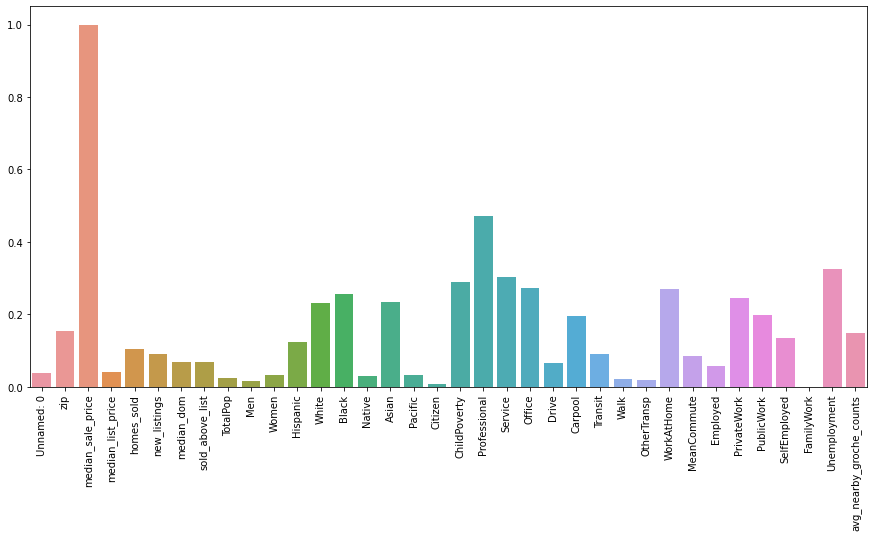

In [ ]:
res=df.corr()['median_sale_price'][:-1].abs()
figsize(15,7)
ax = sns.barplot(x=res.index.values, y=res.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
new_df = df[df['period_begin'].str.contains('2015|2016')==False]

[Text(0, 0, 'Unnamed: 0'),
 Text(0, 0, 'zip'),
 Text(0, 0, 'median_sale_price'),
 Text(0, 0, 'median_list_price'),
 Text(0, 0, 'homes_sold'),
 Text(0, 0, 'new_listings'),
 Text(0, 0, 'median_dom'),
 Text(0, 0, 'sold_above_list'),
 Text(0, 0, 'TotalPop'),
 Text(0, 0, 'Men'),
 Text(0, 0, 'Women'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Native'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Pacific'),
 Text(0, 0, 'Citizen'),
 Text(0, 0, 'ChildPoverty'),
 Text(0, 0, 'Professional'),
 Text(0, 0, 'Service'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Drive'),
 Text(0, 0, 'Carpool'),
 Text(0, 0, 'Transit'),
 Text(0, 0, 'Walk'),
 Text(0, 0, 'OtherTransp'),
 Text(0, 0, 'WorkAtHome'),
 Text(0, 0, 'MeanCommute'),
 Text(0, 0, 'Employed'),
 Text(0, 0, 'PrivateWork'),
 Text(0, 0, 'PublicWork'),
 Text(0, 0, 'SelfEmployed'),
 Text(0, 0, 'FamilyWork'),
 Text(0, 0, 'Unemployment'),
 Text(0, 0, 'avg_nearby_groche_counts')]

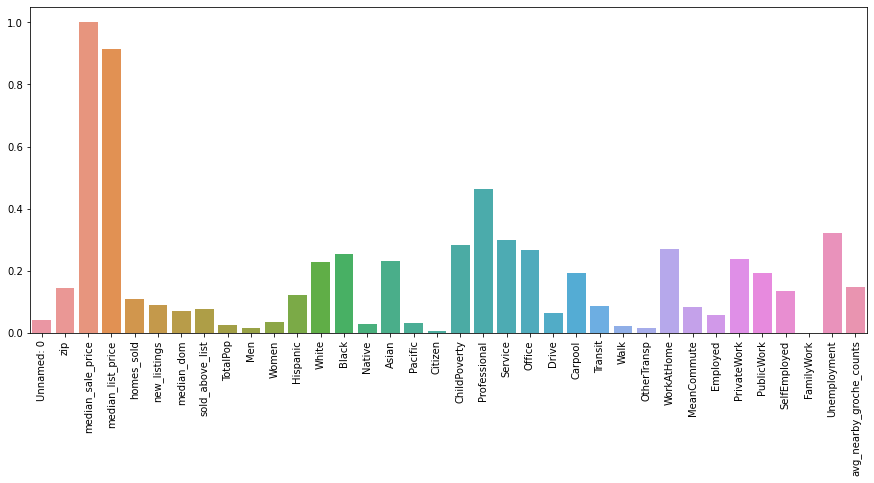

In [ ]:
res=new_df.corr()['median_sale_price'][:-1].abs()
figsize(15,6)
ax = sns.barplot(x=res.index.values, y=res.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Using nearby grocery store counts

[Text(0, 0, 'Unnamed: 0'),
 Text(0, 0, 'zip'),
 Text(0, 0, 'median_sale_price'),
 Text(0, 0, 'median_list_price'),
 Text(0, 0, 'homes_sold'),
 Text(0, 0, 'new_listings'),
 Text(0, 0, 'median_dom'),
 Text(0, 0, 'sold_above_list'),
 Text(0, 0, 'TotalPop'),
 Text(0, 0, 'Men'),
 Text(0, 0, 'Women'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Native'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Pacific'),
 Text(0, 0, 'Citizen'),
 Text(0, 0, 'ChildPoverty'),
 Text(0, 0, 'Professional'),
 Text(0, 0, 'Service'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Drive'),
 Text(0, 0, 'Carpool'),
 Text(0, 0, 'Transit'),
 Text(0, 0, 'Walk'),
 Text(0, 0, 'OtherTransp'),
 Text(0, 0, 'WorkAtHome'),
 Text(0, 0, 'MeanCommute'),
 Text(0, 0, 'Employed'),
 Text(0, 0, 'PrivateWork'),
 Text(0, 0, 'PublicWork'),
 Text(0, 0, 'SelfEmployed'),
 Text(0, 0, 'FamilyWork'),
 Text(0, 0, 'Unemployment'),
 Text(0, 0, 'avg_nearby_groche_counts')]

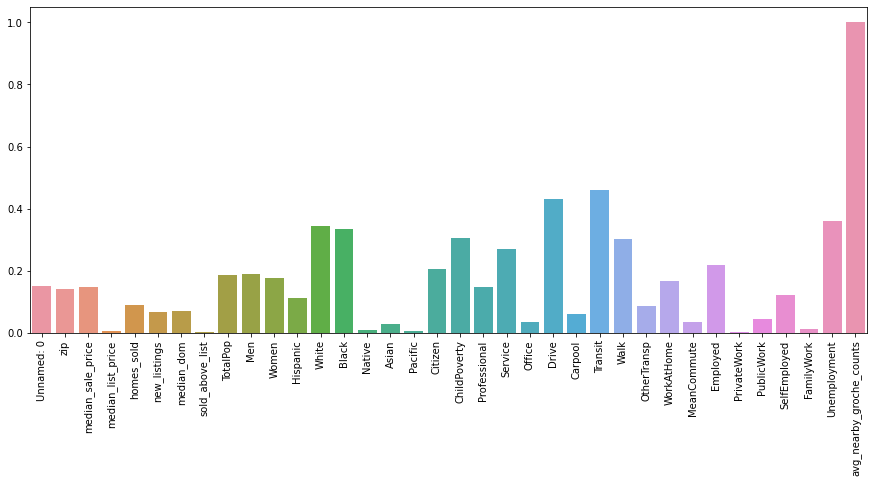

In [ ]:
res=df.corr()['avg_nearby_groche_counts'][:-1].abs()
figsize(15,6)
ax = sns.barplot(x=res.index.values, y=res.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Using Number off food deserts

[Text(0, 0, 'Unnamed: 0'),
 Text(0, 0, 'zip'),
 Text(0, 0, 'median_sale_price'),
 Text(0, 0, 'median_list_price'),
 Text(0, 0, 'homes_sold'),
 Text(0, 0, 'new_listings'),
 Text(0, 0, 'median_dom'),
 Text(0, 0, 'sold_above_list'),
 Text(0, 0, 'TotalPop'),
 Text(0, 0, 'Men'),
 Text(0, 0, 'Women'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Native'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Pacific'),
 Text(0, 0, 'Citizen'),
 Text(0, 0, 'ChildPoverty'),
 Text(0, 0, 'Professional'),
 Text(0, 0, 'Service'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Drive'),
 Text(0, 0, 'Carpool'),
 Text(0, 0, 'Transit'),
 Text(0, 0, 'Walk'),
 Text(0, 0, 'OtherTransp'),
 Text(0, 0, 'WorkAtHome'),
 Text(0, 0, 'MeanCommute'),
 Text(0, 0, 'Employed'),
 Text(0, 0, 'PrivateWork'),
 Text(0, 0, 'PublicWork'),
 Text(0, 0, 'SelfEmployed'),
 Text(0, 0, 'FamilyWork'),
 Text(0, 0, 'Unemployment'),
 Text(0, 0, 'avg_nearby_groche_counts')]

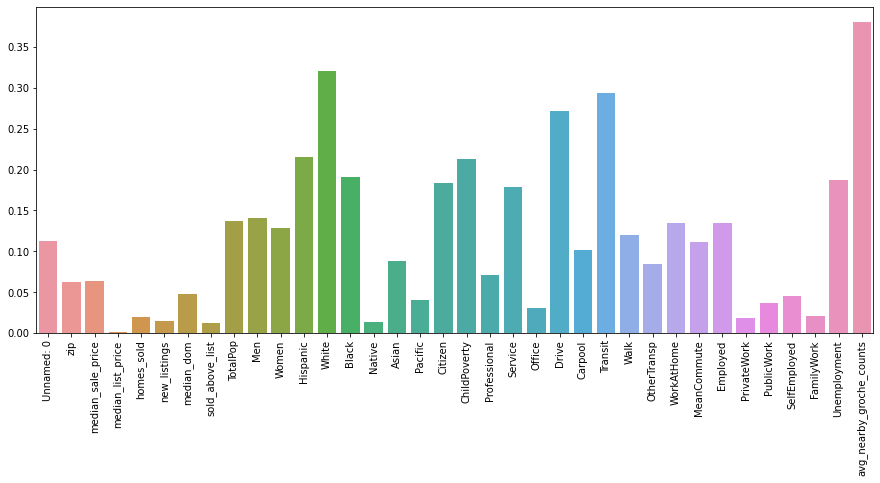

In [ ]:
res=df.corr()['num_food_deserts'][:-1].abs()
figsize(15,6)
ax = sns.barplot(x=res.index.values, y=res.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Comparing counties by averge nearby grocery counts

[Text(0, 0, 'Alexandria city'),
 Text(0, 0, 'Anne Arundel'),
 Text(0, 0, 'Anoka'),
 Text(0, 0, 'Arlington'),
 Text(0, 0, 'Baltimore'),
 Text(0, 0, 'Baltimore city'),
 Text(0, 0, 'Calvert'),
 Text(0, 0, 'Carroll'),
 Text(0, 0, 'Carver'),
 Text(0, 0, 'Charles'),
 Text(0, 0, 'Cherokee'),
 Text(0, 0, 'Chisago'),
 Text(0, 0, 'Clarke'),
 Text(0, 0, 'Clayton'),
 Text(0, 0, 'Cobb'),
 Text(0, 0, 'Culpeper'),
 Text(0, 0, 'Dakota'),
 Text(0, 0, 'DeKalb'),
 Text(0, 0, 'Douglas'),
 Text(0, 0, 'Fairfax'),
 Text(0, 0, 'Fairfax city'),
 Text(0, 0, 'Falls Church city'),
 Text(0, 0, 'Fauquier'),
 Text(0, 0, 'Fayette'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'Fredericksburg city'),
 Text(0, 0, 'Fulton'),
 Text(0, 0, 'Gila'),
 Text(0, 0, 'Gwinnett'),
 Text(0, 0, 'Harford'),
 Text(0, 0, 'Hartford'),
 Text(0, 0, 'Hennepin'),
 Text(0, 0, 'Henry'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'Isanti'),
 Text(0, 0, 'Le Sueur'),
 Text(0, 0, 'Loudoun'),
 Text(0, 0, 'Madison'),
 Text(0, 0, 'Manassas Park city'),
 Text(0, 0

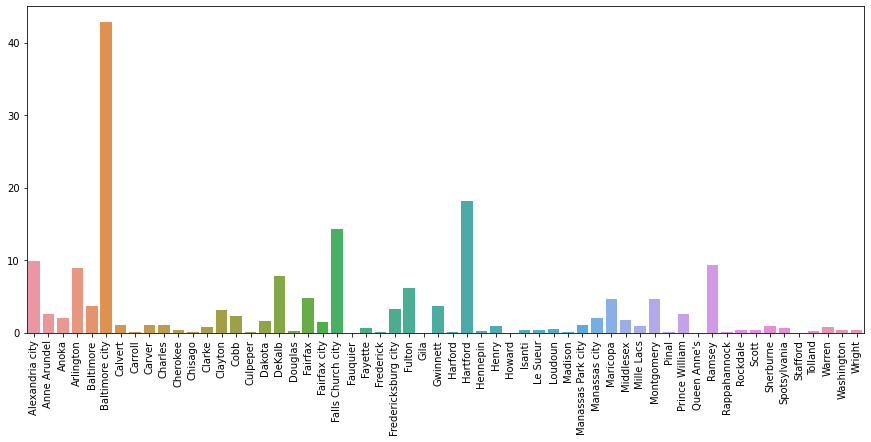

In [ ]:
combined1 = df.groupby(['County'],as_index=False)['avg_nearby_groche_counts'].mean()
figsize(15,6)
ax = sns.barplot(x=combined1['County'].values, y=combined1['avg_nearby_groche_counts'].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Comparing counties by number of food deserts

[Text(0, 0, 'Alexandria city'),
 Text(0, 0, 'Anne Arundel'),
 Text(0, 0, 'Anoka'),
 Text(0, 0, 'Arlington'),
 Text(0, 0, 'Baltimore'),
 Text(0, 0, 'Baltimore city'),
 Text(0, 0, 'Calvert'),
 Text(0, 0, 'Carroll'),
 Text(0, 0, 'Carver'),
 Text(0, 0, 'Charles'),
 Text(0, 0, 'Cherokee'),
 Text(0, 0, 'Chisago'),
 Text(0, 0, 'Clarke'),
 Text(0, 0, 'Clayton'),
 Text(0, 0, 'Cobb'),
 Text(0, 0, 'Culpeper'),
 Text(0, 0, 'Dakota'),
 Text(0, 0, 'DeKalb'),
 Text(0, 0, 'Douglas'),
 Text(0, 0, 'Fairfax'),
 Text(0, 0, 'Fairfax city'),
 Text(0, 0, 'Falls Church city'),
 Text(0, 0, 'Fauquier'),
 Text(0, 0, 'Fayette'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'Fredericksburg city'),
 Text(0, 0, 'Fulton'),
 Text(0, 0, 'Gila'),
 Text(0, 0, 'Gwinnett'),
 Text(0, 0, 'Harford'),
 Text(0, 0, 'Hartford'),
 Text(0, 0, 'Hennepin'),
 Text(0, 0, 'Henry'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'Isanti'),
 Text(0, 0, 'Le Sueur'),
 Text(0, 0, 'Loudoun'),
 Text(0, 0, 'Madison'),
 Text(0, 0, 'Manassas Park city'),
 Text(0, 0

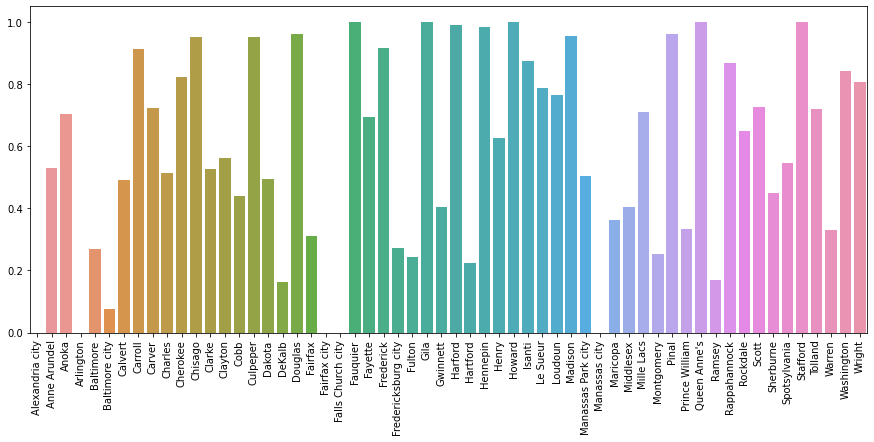

In [ ]:
combined1 = df.groupby(['County'],as_index=False)['num_food_deserts'].mean()
figsize(15,6)
ax = sns.barplot(x=combined1['County'].values, y=combined1['num_food_deserts'].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
#Top and bottom five tracts based on Median Sale Price  
print ("Here are the top and bottom five tracts based on Median Sale Price: ")
df[["zip","median_sale_price",'Black','White', 'Hispanic', "Asian", "Pacific", "Native"]].sort_values(by = "median_sale_price", ascending = False)

Here are the top and bottom five tracts based on Median Sale Price: 


,zip,median_sale_price,Black,White,Hispanic,Asian,Pacific,Native
1515261,20184,9500000.0,7.2,83.6,1.2,1.6,0.0,0.4
1515214,20184,9500000.0,5.3,89.4,5.0,0.0,0.0,0.3
1515213,20184,9500000.0,7.2,83.6,1.2,1.6,0.0,0.4
1515212,20184,9500000.0,6.0,78.7,10.4,0.9,0.0,0.0
1515260,20184,9500000.0,6.0,78.7,10.4,0.9,0.0,0.0
...,...,...,...,...,...,...,...,...
2117010,22701,288.0,25.4,51.4,14.7,3.8,0.0,0.0
2117006,22701,288.0,8.5,73.1,11.4,0.5,0.0,0.3
2117011,22701,288.0,12.5,73.6,9.1,0.9,0.0,0.0
2117012,22701,288.0,25.1,65.2,7.6,0.8,0.0,0.1


In [ ]:
df = df.dropna()
df.shape

(3523459, 41)

Correlation of race, housing data, and food desert data 

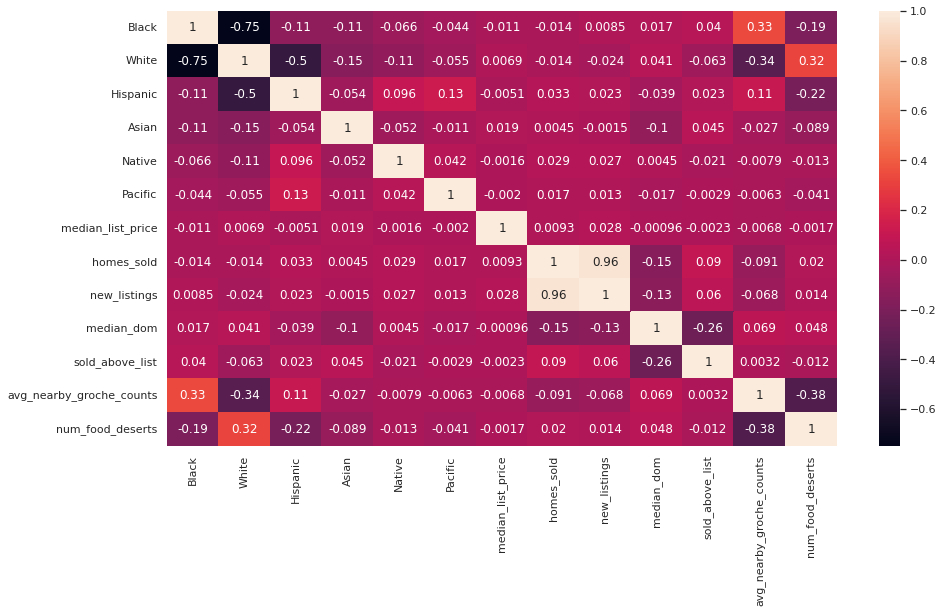

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
f = ( df.loc[:, ['Black', 'White', 'Hispanic','Asian', 'Native','Pacific','median_list_price', 'homes_sold',	'new_listings',	'median_dom',	'sold_above_list','avg_nearby_groche_counts',	'num_food_deserts']]).corr()

sns.heatmap(f, annot=True)

Comparison of Black pop to nearby grocery counts 

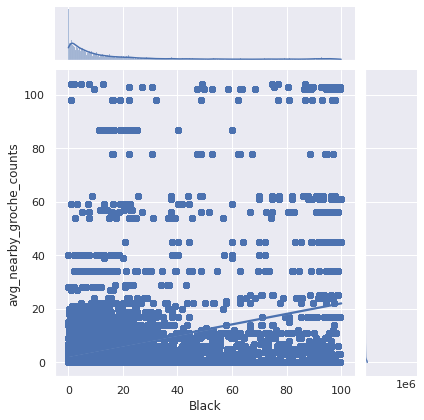

In [ ]:
sns.jointplot(x='Black', y='avg_nearby_groche_counts', data=df, kind="reg")

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DATA 606 Capstone Project/Datasets and Information/CSVs/new_desert.csv')

In [ ]:
df2.head()

,Unnamed: 0,zip,County,desert,avg_nearby_groche_counts,TotalPop,Transit,Walk,Drive,OtherTransp
0,0,6409,Middlesex,Well Fed,3.0,6634,5.3,0.0,80.3,1.9
1,1,6409,Middlesex,Well Fed,3.0,6634,5.3,0.0,80.3,1.9
2,2,6409,Middlesex,Well Fed,3.0,6634,5.3,0.0,80.3,1.9
3,3,6409,Middlesex,Well Fed,3.0,6634,5.3,0.0,80.3,1.9
4,4,6409,Middlesex,Well Fed,3.0,6634,5.3,0.0,80.3,1.9


Create a function of categorize each zip code by urban or rural and well-fed or food desert. A population of > 3000 is rural. 

In [ ]:
new_desert2 = [
    (df2['desert'] == 'Well Fed') & (df2['TotalPop'] > 3000),
    (df2['desert'] == 'Well Fed') & (df2['TotalPop'] <3000),
    (df2['desert'] == 'Desert') & (df2['TotalPop'] > 3000),
    (df2['desert'] == 'Desert') & (df2['TotalPop'] < 3000),
    ]

# create a list of the values we want to assign for each condition
values = ['Urban Well Fed', 'Rural Well Fed', 'Urban Food Desert', 'Rural Food Desert']

# create a new column and use np.select to assign values to it using our lists as arguments
df2['Urban or Rural'] = np.select(new_desert2, values)

# display updated DataFrame
df2.head()

KeyError: ignored

In [ ]:
# One-hot encode the data using pandas get_dummies
df2 = pd.get_dummies(df2)
# Display the first 5 rows of the last 12 columns
df2.iloc[:,5:].head(5)

,Walk,Drive,OtherTransp,County_Alexandria city,County_Anne Arundel,County_Anoka,County_Arlington,County_Baltimore,County_Baltimore city,County_Calvert,County_Carroll,County_Carver,County_Charles,County_Cherokee,County_Chisago,County_Clarke,County_Clayton,County_Cobb,County_Culpeper,County_Dakota,County_DeKalb,County_Douglas,County_Fairfax,County_Fairfax city,County_Falls Church city,County_Fauquier,County_Fayette,County_Frederick,County_Fredericksburg city,County_Fulton,County_Gila,County_Gwinnett,County_Harford,County_Hartford,County_Hennepin,County_Henry,County_Howard,County_Isanti,County_Le Sueur,County_Loudoun,County_Madison,County_Manassas Park city,County_Manassas city,County_Maricopa,County_Middlesex,County_Mille Lacs,County_Montgomery,County_Pinal,County_Prince William,County_Queen Anne's,County_Ramsey,County_Rappahannock,County_Rockdale,County_Scott,County_Sherburne,County_Spotsylvania,County_Stafford,County_Tolland,County_Warren,County_Washington,County_Wright,desert_Food Desert,desert_Well Fed,Urban or Rural_0,Urban or Rural_Rural Well Fed,Urban or Rural_Urban Well Fed
0,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
df2.head(5)

,Unnamed: 0,zip,avg_nearby_groche_counts,TotalPop,Transit,Walk,Drive,OtherTransp,County_Alexandria city,County_Anne Arundel,County_Anoka,County_Arlington,County_Baltimore,County_Baltimore city,County_Calvert,County_Carroll,County_Carver,County_Charles,County_Cherokee,County_Chisago,County_Clarke,County_Clayton,County_Cobb,County_Culpeper,County_Dakota,County_DeKalb,County_Douglas,County_Fairfax,County_Fairfax city,County_Falls Church city,County_Fauquier,County_Fayette,County_Frederick,County_Fredericksburg city,County_Fulton,County_Gila,County_Gwinnett,County_Harford,County_Hartford,County_Hennepin,County_Henry,County_Howard,County_Isanti,County_Le Sueur,County_Loudoun,County_Madison,County_Manassas Park city,County_Manassas city,County_Maricopa,County_Middlesex,County_Mille Lacs,County_Montgomery,County_Pinal,County_Prince William,County_Queen Anne's,County_Ramsey,County_Rappahannock,County_Rockdale,County_Scott,County_Sherburne,County_Spotsylvania,County_Stafford,County_Tolland,County_Warren,County_Washington,County_Wright,desert_Food Desert,desert_Well Fed,Urban or Rural_0,Urban or Rural_Rural Well Fed,Urban or Rural_Urban Well Fed
0,0,6409,3.0,6634,5.3,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,6409,3.0,6634,5.3,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2,6409,3.0,6634,5.3,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,3,6409,3.0,6634,5.3,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,4,6409,3.0,6634,5.3,0.0,80.3,1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
